In [81]:
import pandas as pd
import polyline
import matplotlib.pyplot as plt

In [132]:
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.values(): 
        spine.set_visible(False)
        
def plot_run_data(listOfPolylines, lineColor, lineOpacity, lineWidth, backgroundColor, outputFileName):
    """
    plots and saves an image of a heatmap
    params:
    - data: list of list or a dataframe, where each list or df row is GPS coordinates compiled in load_run_data()
    -lineColor: color of each GPX track
    -lineOpacity: how transparent each GPX track is
    -lineWidth: the stroke width for each GPX track
    -backgroundColor: color for heatmap's background, since we're not plotting on a traditional map
    -outputFileName: name of file heatmap image will be saved as 
    -minLat, maxLat, minLong, maxLong: dimensions for the map to help focus in on a specific area
    """
    
    # I used 80 x 80 for pictures I printed out into a 16" x 16" poster and it was perfect
    # you might need to mess around with these values for larger or bigger posters, and especially for non-square posters
    fig = plt.figure(figsize=(80,80)) 
    
    # convert summary polylines into lat and lon coordinates
    activityCount = 0
    main_df = pd.DataFrame({'lat':[], '2':[], '3':[]})
    
    for sp in polylines:
        data = polyline.decode(sp)
        df = pd.DataFrame(data)
        df.columns=['lat','lon']
        df['activity'] = activityCount
        
        if activityCount == 0:
            main_df = df
        else:
            main_df = pd.concat([main_df, df])
        
        activityCount += 1
        
    for i in main_df['activity'].unique():
        activity = main_df[main_df['activity'] == i]
        plt.plot(activity['lon'], activity['lat'], color=lineColor, linewidth=lineWidth, alpha=lineOpacity)

    #plt.plot(df['lon'], df['lat'], color=lineColor, linewidth=lineWidth, alpha=lineOpacity)

    ax = plt.gca()
    plt.grid(False)
    ax.patch.set_facecolor(backgroundColor)
    ax.set_aspect('auto','box','C')
    clear_frame()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=.1)
    
    
    # these next few params are less design choices and more important for users with GPX files from multiple cities
    # to prevent your map from looking like a blank canvas with some random dots on it, you'll want focus your heatmap on any
    # given city by setting the plot boundaries as the city's min and max lat and long coordinates
    # optional: if run_data contains activities from multiple cities, focus your heatmap on any
    # given city by setting the plot boundaries as the citie's min and max long and lat coordinates
    minLat = 41.842478
    maxLat = 41.997140
    minLong = -87.736843
    maxLong = -87.533279
    # 41.997140, -87.736843
    # 41.842478, -87.533279

    plt.xlim((minLong, maxLong))
    plt.ylim((minLat, maxLat))
    
    plt.savefig(output_file_name, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0,
        metadata=None)

In [127]:
# get the data - all polylines, one per GPX activity
polylines = list(pd.read_csv("../data/chicago.csv")['summary_polyline'])

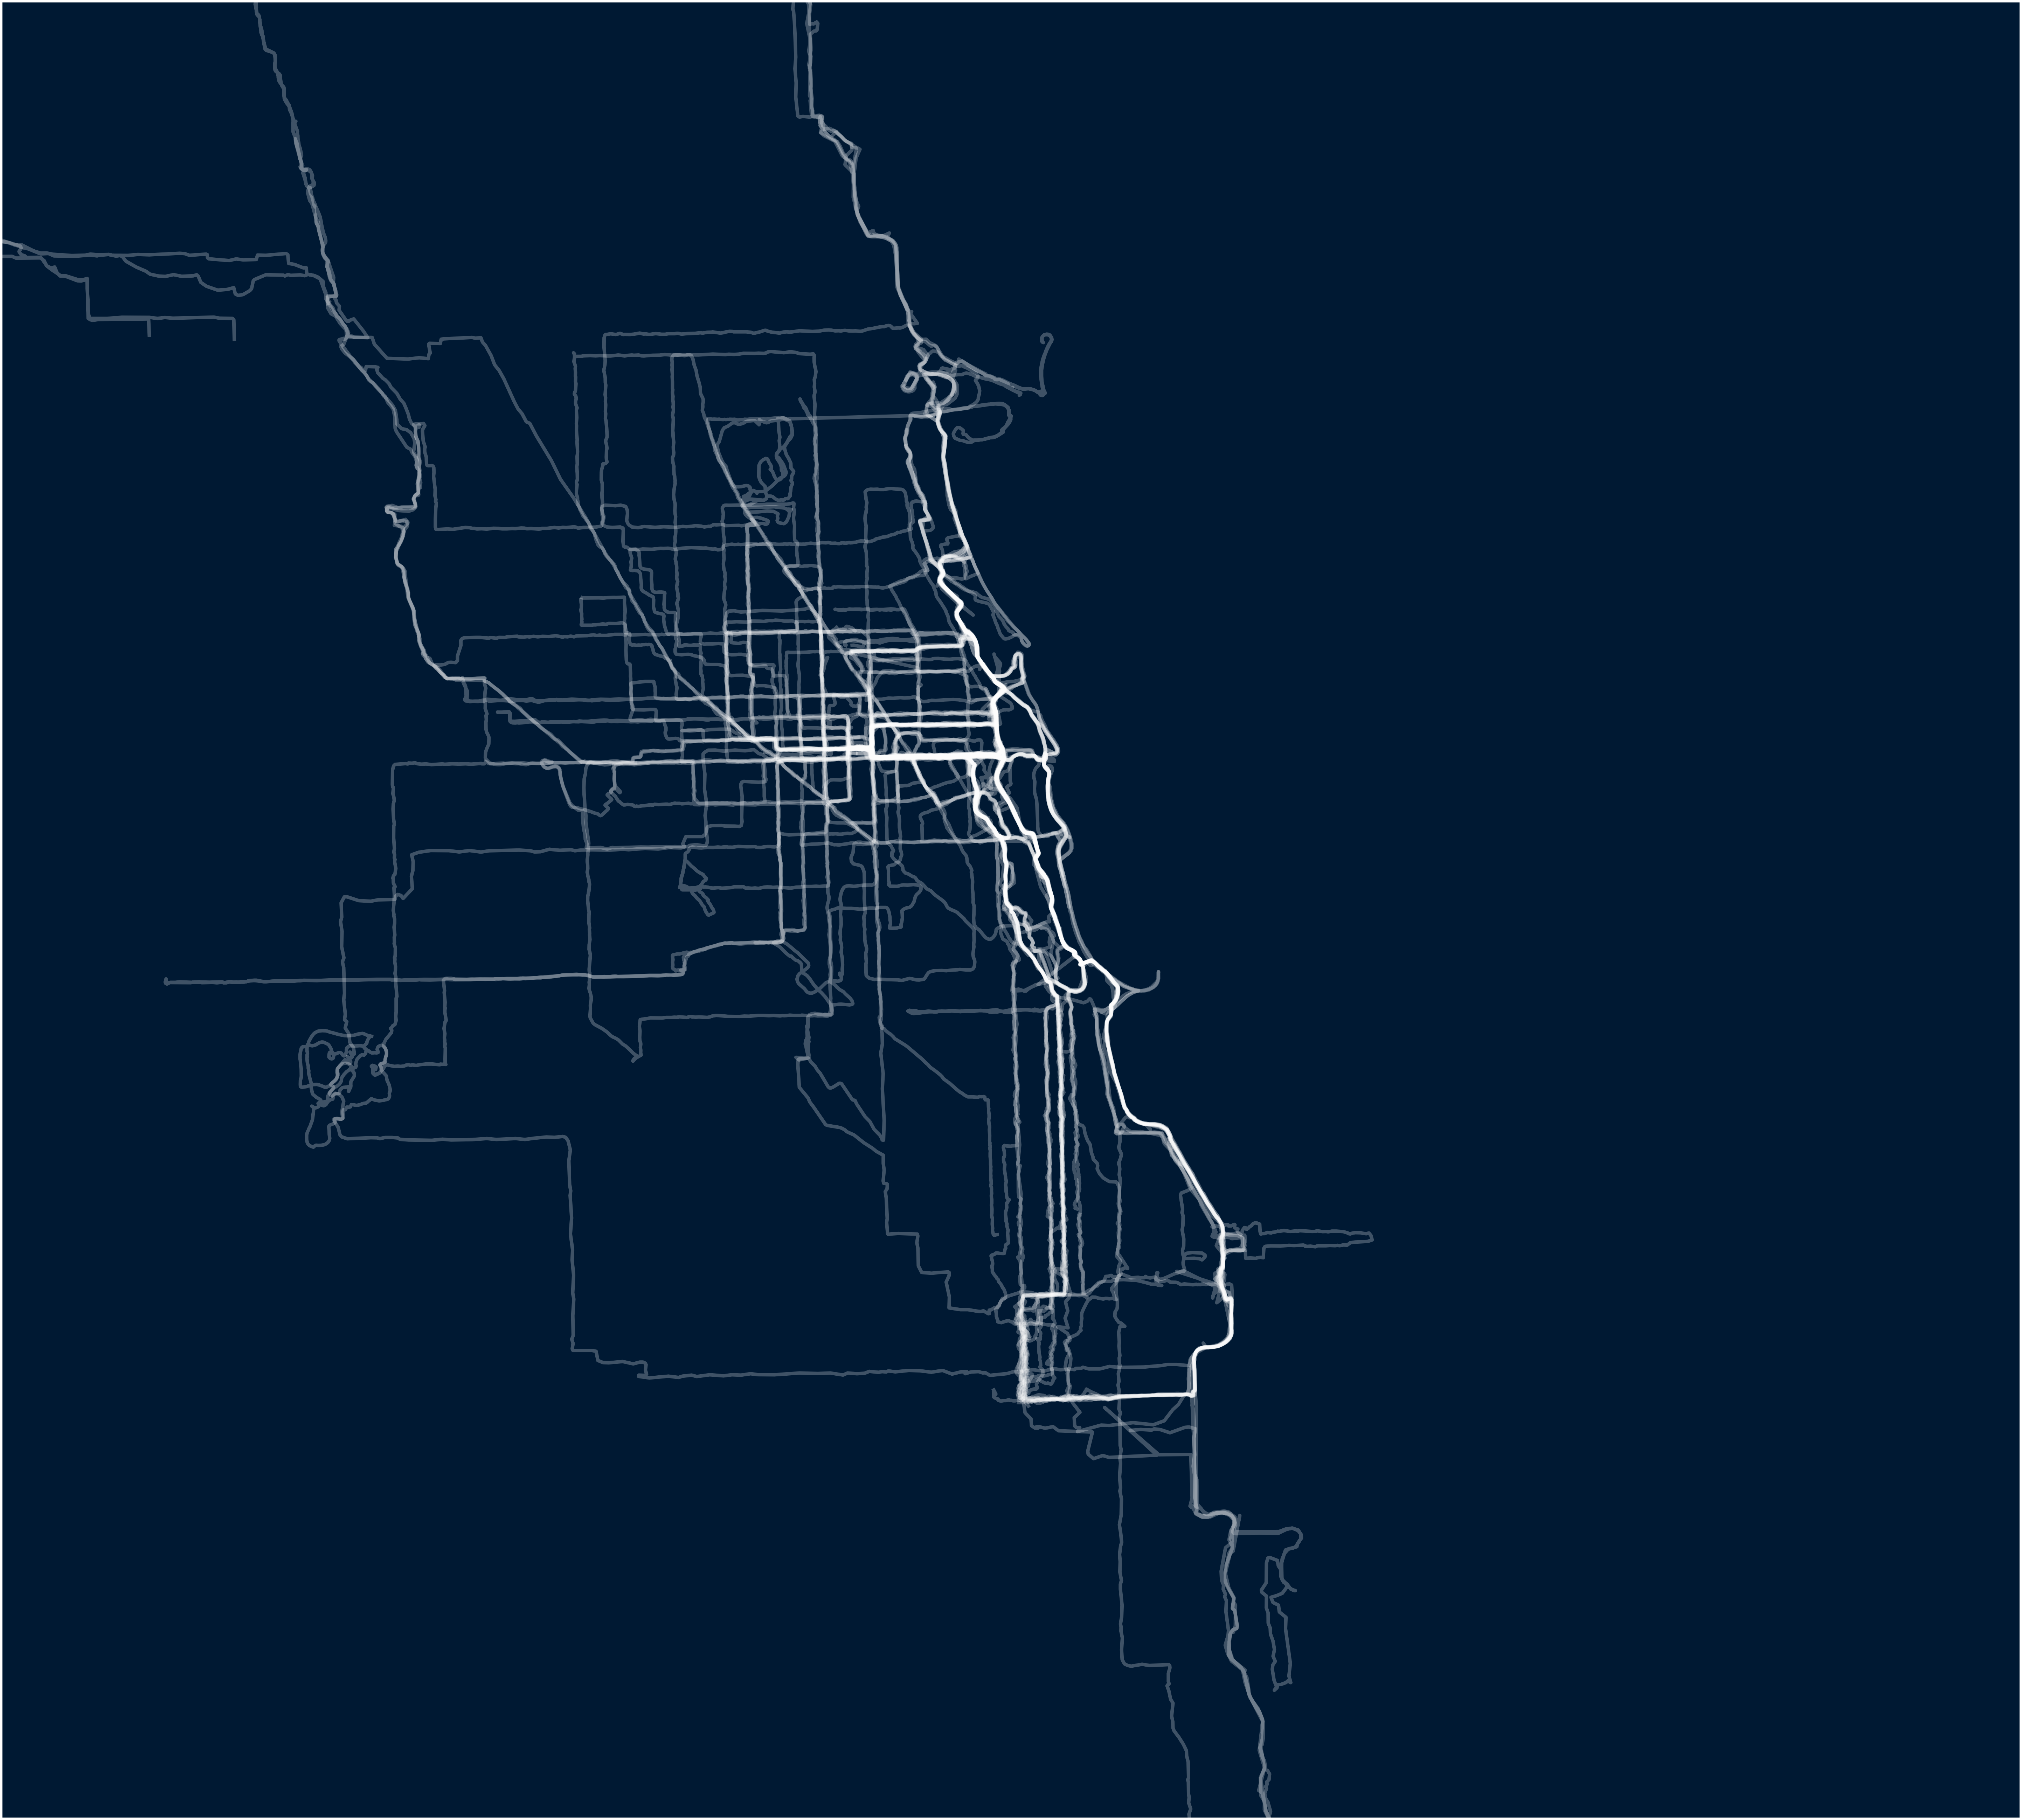

In [133]:
lineColor = '#FFFFFF' # stroke color
lineOpacity = 0.25 # stroke alpha value
lineWidth = 10 # stroke width
backgroundColor = '#001933' # we're not plotting on a normal map, because ~~art~~ 
output_file_name = 'heatmap.png' # save heatmap under this name

plot_run_data(polylines, lineColor, lineOpacity, lineWidth, backgroundColor, output_file_name)